In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15598, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 15598 (delta 98), reused 115 (delta 54), pack-reused 15393
Receiving objects: 100% (15598/15598), 14.64 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (10626/10626), done.


In [2]:
%cd yolov5

/content/yolov5


In [3]:
pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00


In [4]:
import torch

In [5]:
from IPython.display import Image,clear_output

In [6]:

torch.__version__

'2.0.0+cu118'

In [7]:
%cd /content

/content


In [8]:
!curl -L "https://github.com/adhiraj135/data-for-projects/raw/main/sign_data.zip" > SignData.zip; unzip SignData.zip; rm SignData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3654k  100 3654k    0     0  4129k      0 --:--:-- --:--:-- --:--:-- 4129k
Archive:  SignData.zip
  inflating: data.yaml               
   creating: test/images/
  inflating: test/images/hello18.jpg  
  inflating: test/images/hello19.jpg  
  inflating: test/images/hello20.jpg  
  inflating: test/images/hello7.jpg  
  inflating: test/images/hello8.jpg  
  inflating: test/images/iloveu15.jpg  
  inflating: test/images/iloveu17.jpg  
  inflating: test/images/iloveu18.jpg  
  inflating: test/images/iloveu4.jpg  
  inflating: test/images/iloveu5.jpg  
  inflating: test/images/no13.jpg    
  inflating: test/images/no14.jpg    
  inflating: test/images/no2.jpg     
  inflating: test/images/no6.jpg     
  inflating: test/images/no9.jpg     
  inflating: tes

In [9]:
%cat data.yaml

train: ../train/images
val: ../test/images

nc: 5
names: ['hello','I Love You','No','Please','Sorry']

In [10]:
import yaml


In [11]:
with open("data.yaml","r") as stream:
  num_class=yaml.safe_load(stream)['nc']
  

In [12]:
num_class

5

In [13]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [14]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,"w") as f:
    f.write(cell.format(**globals()))

In [15]:
%%writetemplate /content/yolov5/models/yolov5s_custom.yaml

# parameters
nc: {num_class} # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

#anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [16]:
%cat /content/yolov5/models/yolov5s_custom.yaml


# parameters
nc: 5 # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

#anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3,

In [17]:
%%time
%cd /content/yolov5

/content/yolov5
CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 1.52 ms


In [18]:
!python train.py --img 416 --batch 16 --epochs 10 --data '../data.yaml' --cfg ./models/yolov5s_custom.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

train: weights=yolov5s.pt, cfg=./models/yolov5s_custom.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls

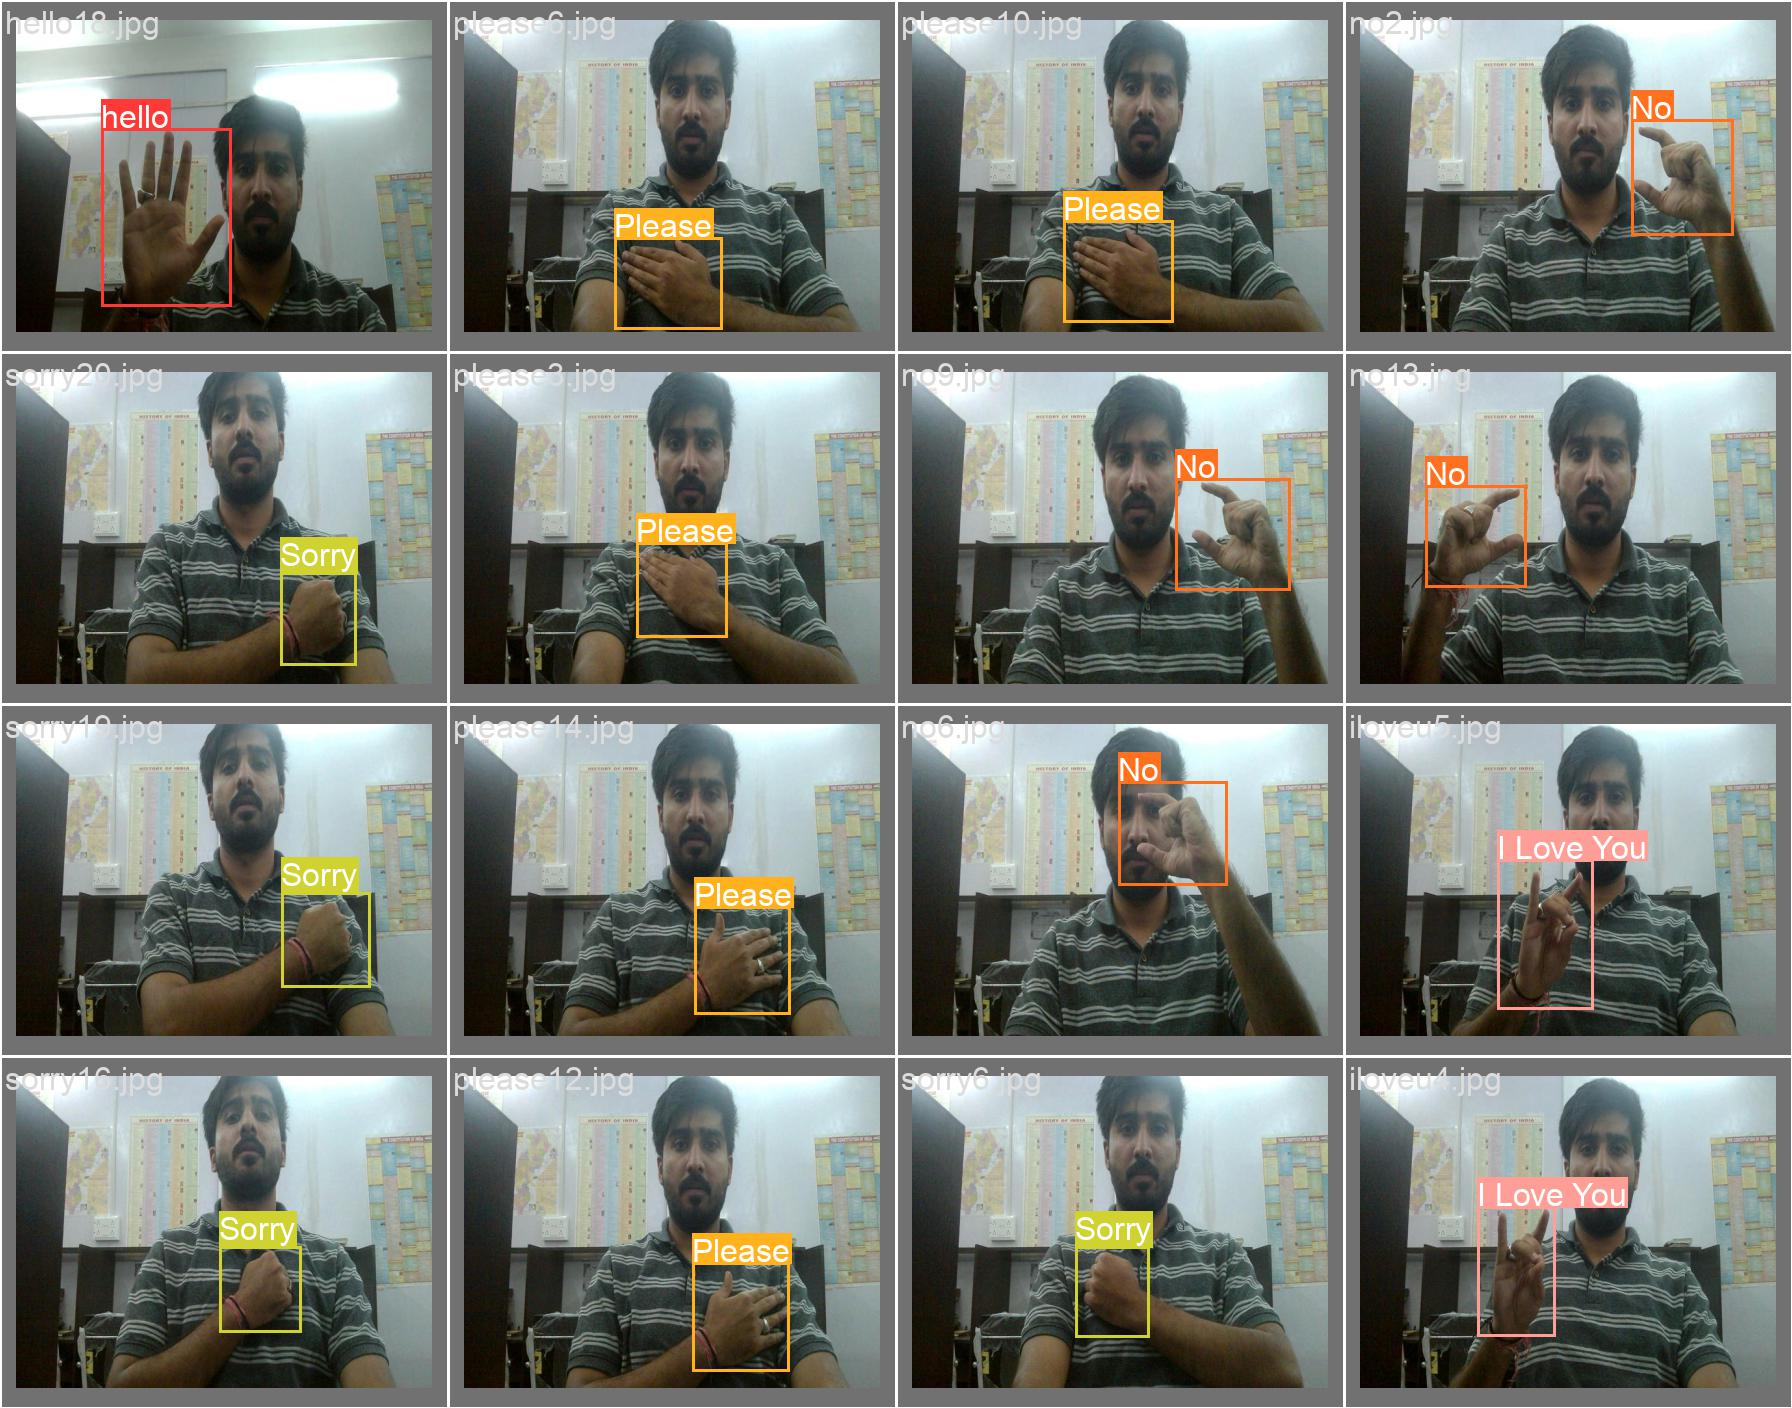

In [19]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg')

In [20]:
%cd

/root


In [21]:
%cd /content/yolov5

/content/yolov5


In [22]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.5 --data ../test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=data/images, data=../test/images, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s_custom summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 416x320 (no detections), 43.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 256x416 (no detections), 42.1ms
Speed: 0.3ms pre-process, 42.6ms inference, 0.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/

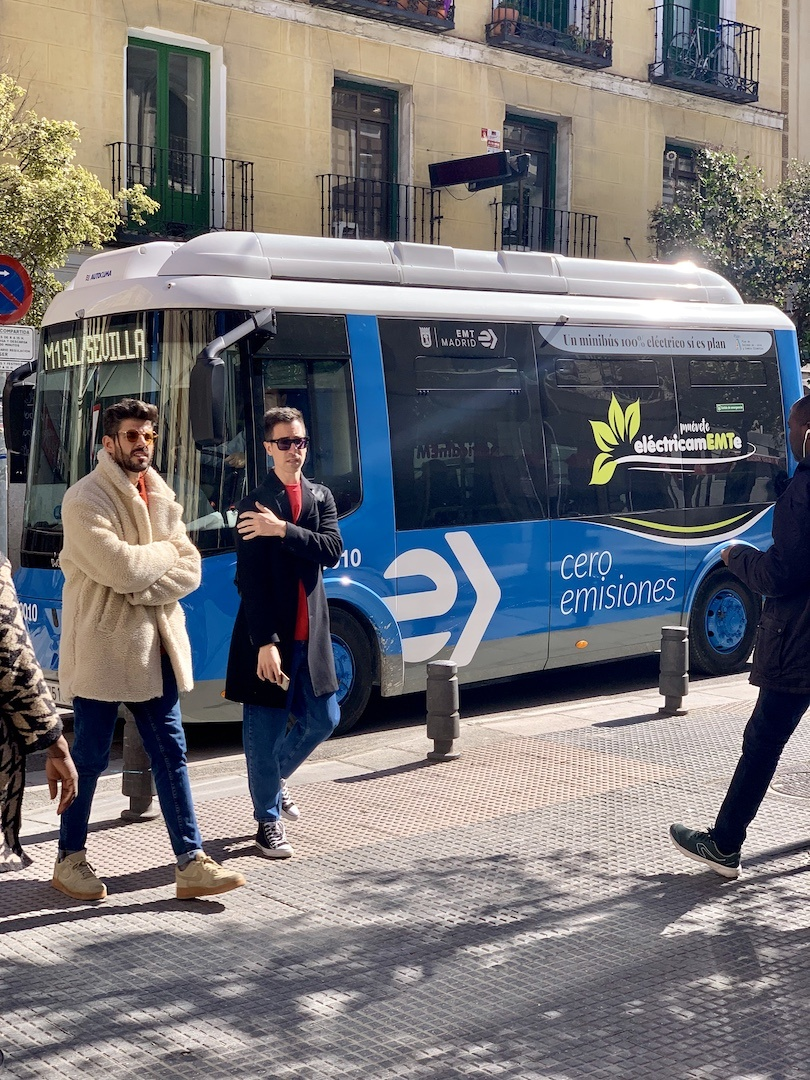

In [23]:
Image(filename="/content/yolov5/runs/detect/exp/bus.jpg")

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/MyDrive/sign_language_detection_project/model